# Uber Data Analytics (Raw)

O conjunto de Dados da Uber é um conjunto de dados de transporte por aplicativo, oferecendo a possibilidade de insights estratégicos. Ele permite o acompanhamento de méticas chave de desempenho, como número de viagens, receita, motoristas ativos, rotas mais populares, duração média das corridas e avaliações de clientes.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Importando o Dataset
df = pd.read_csv('ncr_ride_bookings.csv')

In [24]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


## Localização

Com base na amostra dos dados e na estrutura do dataset, é possível identificar que ele representa operações da Uber na Índia. As colunas Pickup Location e Drop Location incluem bairros e setores como Palam Vihar, Shastri Nagar, Malviya Nagar, Ghitorni Village e Khan Market, todos localizados na região metropolitana da Índia. Além disso, o uso de unidades no sistema métrico (quilômetros) e a presença do método de pagamento UPI (Unified Payments Interface), exclusivo da Índia, reforçam a origem indiana do conjunto de dados.

## Preço das Corridas

Os valores registrados na coluna “Booking Value” representam o preço das corridas em rupias indianas (INR), a moeda oficial da Índia. Essa identificação é coerente com a origem geográfica do dataset e com o padrão de cobrança da Uber no país. Para efeito de comparação e análise financeira internacional, é útil realizar a conversão desses valores para reais (BRL). A taxa de câmbio costuma variar, mas considerando uma média recente de 1 rupia ≈ 0,06 real, uma corrida de ₹500 corresponderia aproximadamente a R$30,00. Essa conversão permite contextualizar os preços dentro da realidade econômica brasileira, facilitando análises comparativas sobre custo médio por viagem, receita total e poder de compra relativo entre os mercados de mobilidade da Índia e do Brasil.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [26]:
df. describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [27]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

## Incosistência no Dataset

Por ser um dataset sintético, existe uma inconsistência na coluna "Booking ID" que deveria ser única, no entanto existem algumas tuplas que tem esse valor duplicado.

In [28]:
df.duplicated(subset='Booking ID').sum()

1233

## Objetivo da Análise

O objetivo desta análise é gerar insights relevantes para os motoristas da Uber, auxiliando-os a maximizar seus ganhos e otimizar o tempo de trabalho. Para isso, serão identificados os melhores horários e locais para operar, considerando as variações de demanda ao longo dos diferentes dias da semana. Essa análise permitirá compreender padrões de comportamento dos usuários e orientar decisões estratégicas sobre quando e onde dirigir para obter os melhores resultados.

In [ ]:
# Configurações visuais
sns.set(style="whitegrid", palette="viridis")

In [30]:
# Converter colunas de data e hora
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

# Criar colunas adicionais
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()

# Filtrar apenas corridas concluídas
completed = df[df['Booking Status'] == 'Completed']

/tmp/ipykernel_12729/2333160025.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


## Demanda de corridas por hora

Neste gráfico, observa-se que os horários de maior demanda são às 10h e às 18h, indicando dois períodos de pico bem definidos ao longo do dia. Esses resultados estão alinhados, em parte, com os horários de pico típicos na Índia, que geralmente ocorrem entre 8h e 9h pela manhã e entre 17h e 20h à noite, quando há maior movimentação de pessoas indo e voltando do trabalho. Embora o pico das 10h apareça ligeiramente fora do intervalo matinal tradicional, ele pode estar associado a deslocamentos tardios, compromissos comerciais iniciando mais tarde ou mesmo ao aumento da demanda por corridas curtas dentro da cidade após o trânsito mais intenso da manhã.

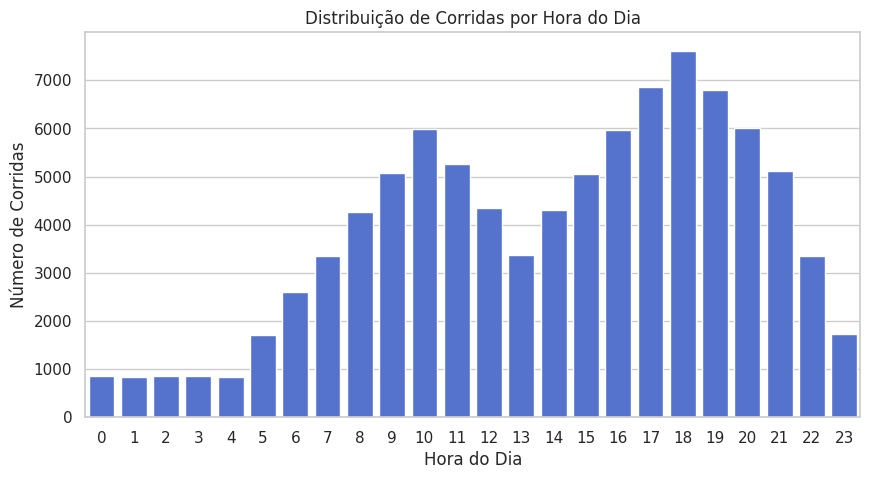

In [31]:
# === 1. Demanda por hora ===
plt.figure(figsize=(10,5))
sns.countplot(data=completed, x='Hour', color='royalblue')
plt.title('Distribuição de Corridas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Corridas')
plt.xticks(range(0, 24))
plt.show()

## Demanda por dia da semana

Neste gráfico, não é possível observar uma variação significativa no número de corridas ao longo dos dias da semana. Esse comportamento pode indicar uma limitação ou viés na geração do dataset. Ainda assim, para fins desta análise, consideraremos esses resultados como representativos dos dados disponíveis, interpretando-os como uma distribuição equilibrada da demanda entre os dias da semana.

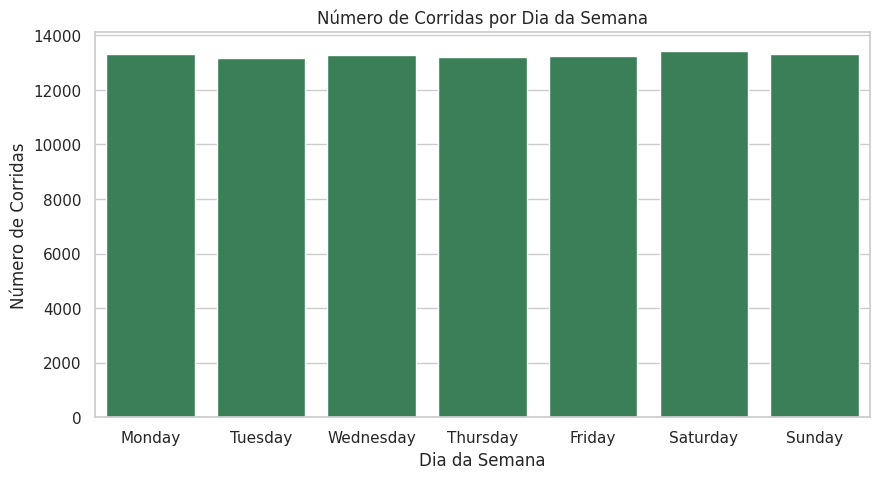

In [32]:

# === 2. Demanda por dia da semana ===
plt.figure(figsize=(10,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=completed, x='DayOfWeek', order=order, color='seagreen')
plt.title('Número de Corridas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Corridas')
plt.show()

## Locais com o maior número de partidas

A partir deste gráfico, é possível identificar os 10 principais locais com maior número de partidas. Com base nessas informações, podemos orientar os motoristas a iniciarem suas atividades nos pontos com maior demanda, aumentando as chances de conseguir corridas rapidamente e potencializando sua eficiência e ganhos ao longo do dia.

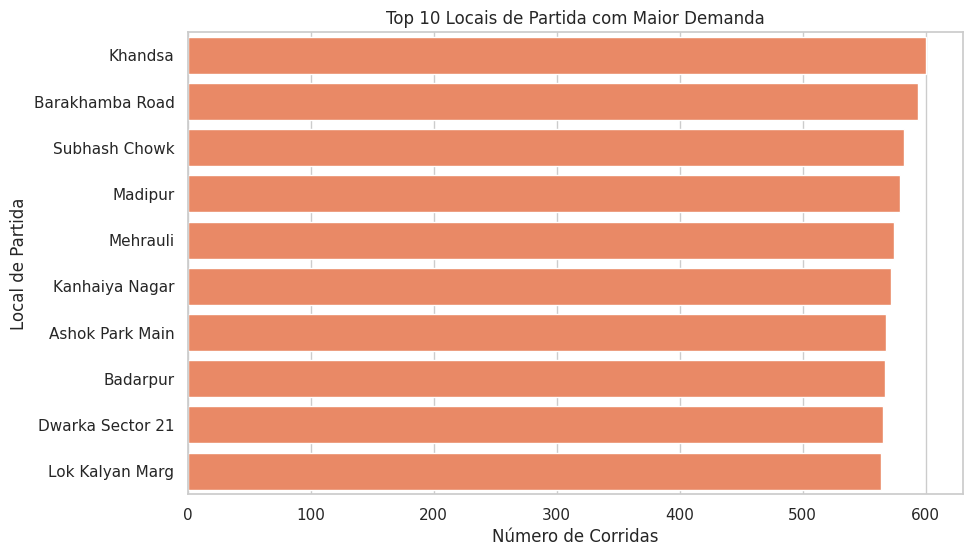

In [36]:
# === 3. Locais com maior número de partidas ===
plt.figure(figsize=(10,6))
top_pickups = completed['Pickup Location'].value_counts().head(10)
sns.barplot(x=top_pickups.values, y=top_pickups.index, color='coral')
plt.title('Top 10 Locais de Partida com Maior Demanda')
plt.xlabel('Número de Corridas')
plt.ylabel('Local de Partida')
plt.show()

## Identificação de Outliers

Foram identificados 3.127 outliers na coluna Booking Value. A maior parte das corridas são curtas ou médias, custando normalmente até 1.400 rupias indianas (aproximadamente R$87). No entanto, algumas corridas mais longas ultrapassam 4.000 rupias indianas (cerca de R$250). Apesar de esses valores se distanciarem da média, eles ainda são plausíveis para corridas longas, indicando que os outliers não representam erros de registro, mas sim casos excepcionais de viagens extensas.

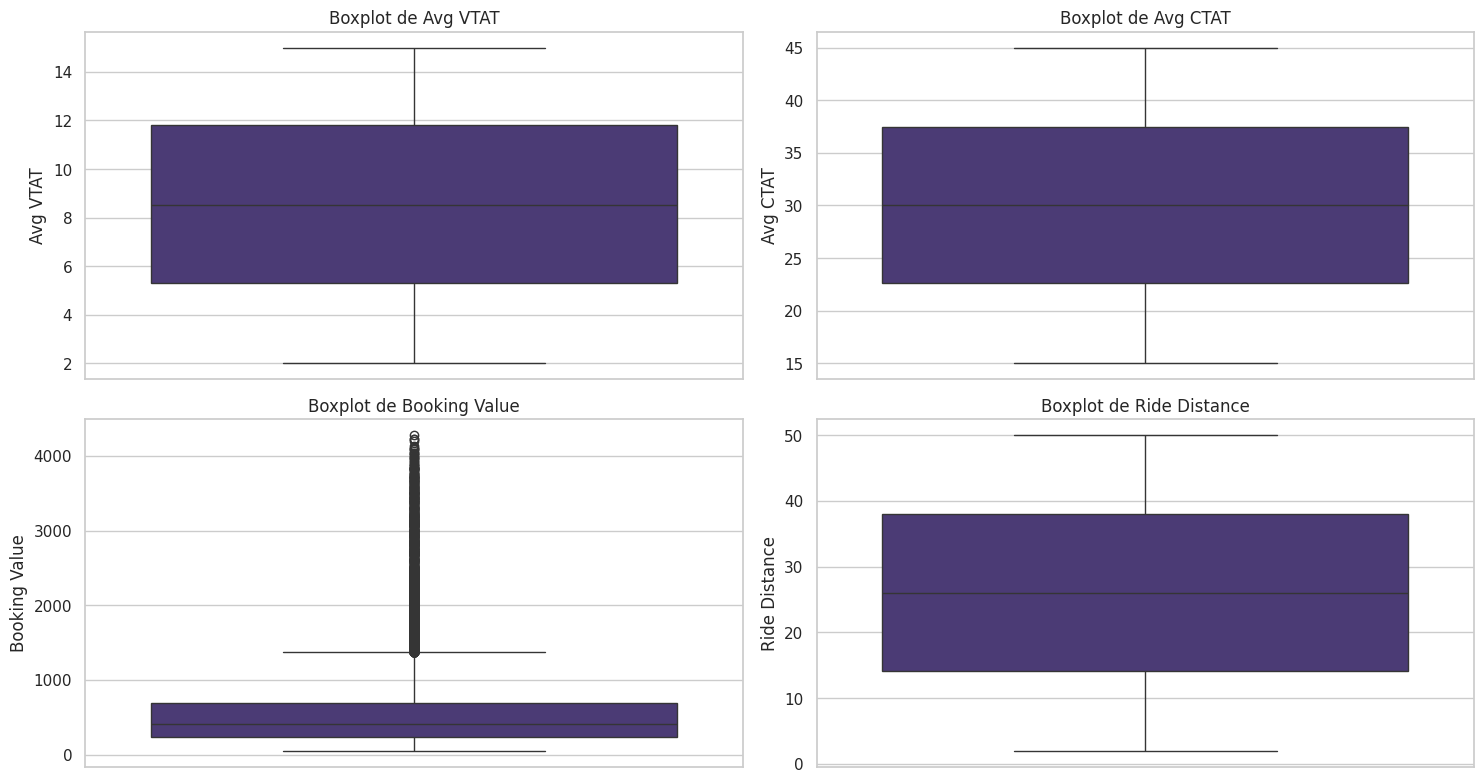

In [40]:
# Colunas numéricas relevantes
numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance']

# Criar boxplots para identificar visualmente outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=completed[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [41]:
outliers = {}
for col in numeric_cols:
    Q1 = completed[col].quantile(0.25)
    Q3 = completed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = completed[(completed[col] < lower_bound) | (completed[col] > upper_bound)][col]
    print(f"{col}: {len(outliers[col])} outliers")

Avg VTAT: 0 outliers
Avg CTAT: 0 outliers
Booking Value: 3127 outliers
Ride Distance: 0 outliers
